# CS418 Data Pirates
1.Arsalan Babar 
2.Imran Babar
3.Vraj Patel
4.Dilip Vemuri
5.Jason Yeoh

GitHub Repo for this notebook:

https://github.com/edgeslab/CS418-Project/blob/master/418_ProjectV3.ipynb


# PROJECT INTRODUCTION
Our team is analyzing the correlation between the increasing economic polarization in Chicago and changing crime landscape of the city. We are finding out the factors contributing to the disappearing middle class. In order to go over factors, we are looking into the socioeconomic trends that could help us understand each community area in Chicago.

We are using three data sets. The following datasets are as follows:

* **Chicago Crimes** (2001-present) 
	 https://catalog.data.gov/dataset/crimes-2001-to-present-398a4
#of records: 6.8M entries of crime incidents
IUCR is a four-digit code that law enforcement agencies use to classify criminal incidents when taking individual reports.
Crime location description gives important geographical metrics to better identify areas most at risk for violence.
* **Chicago Socioeconomic Trends** (2008-2012)
https://catalog.data.gov/dataset/census-data-selected-socioeconomic-indicators-in-chicago-2008-2012-36e55
#of records: 77 entries (each entry corresponds to a community area)
This dataset looks over six socioeconomic indicators, such as (a) unemployment rate, (b) % of households below poverty level, (c) % of <25 individuals without a high school diploma, (d) % of non-working class (minors and senior citizens) population, (e) crowded housing and (f) per capita income across Chicago community areas. 
Both datasets will be joined on community area number (assigned by the city of Chicago).
The hardship index is a score that incorporates each of the six selected socioeconomic indicators according to the method described in An Update on Urban Hardship
* **Chicago Map Boundaries**
https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6
#of records: 77 entries (each entry corresponds to a community area)
This dataset provides the geometrical specifications (such as perimeter, area, shape) of each of the 77 Chicago neighborhood.



# CHANGES

There have been really no changes to the scope. We have specifically been looking at the 
Chicago Crime dataset and socioeconomic factors and trying to figure out what's happening with the middle
class and why it is disappearing in many of the neighborhoods. We are anazlying the crimes and correlating 
with socioeconomic factors.

# DATA CLEANING

For data cleaning, we used python to filter crimes data. We needed to use python because crime data csv file was too large. The Data we had initially consisted of crime data from the year 2001 to present. For this project, we only require data from 2008 to 2012 as we have to correalate it with the Socioeconomic data set which was from 2008 to 2012. We basically first cleaned the data by removing all the unwanted years. Furthermore, the crime data consisted alot of unneccessary columns. We decided to keep only the columns that were beneficial to our project and removed the rest so the file size could be reduced. The code for cleaning the data in our github directory. Lastly, the Socioeconomic data set is pretty small and it didn't need much cleaning. 

# EXPLORATORY DATA ANALYSIS

Our data is coming from two datasets, crime data and socio economic data. Our sources overlap in the years 2008-2012, so those are the years we will be focusing on. Both data sets are rectangular and we can match them on the Key of "Community Area". Below we printed the heads of our crime data and socio econmic data, and you can see they both have community numbers and thats how we will match them. We will also have to filter out all the extraneous columns from each dataset to get only what we need. Our crime data already tells us the total number of crimes in Community Area, so no further aggregation is needed, it will be a 1:1 matching. For preliminary conclusions, We can already see that areas with lower socio-econmic standing and overall well-being have higher crime rate. Our goal will be to see which areas have gone down in terms of socio-economic standing during 2008-2012 and see how the crime rates have changed. We will have to have a control on if a certain amount of change is siginificant compared to a gradual drop or rise in crime across all of Chicago. Our data comes directly from the City and we are confident in how it was collected and the measurements used, but we will have to double check to make sure to address any possible biases. We will also need to be careful to make sure to let the data inform our hypothesis and not the other way around, i.e force the data to match what we want to see. But from our preliminary analysis, we can already see that areas that become poorer can expect to have a rise in crime.

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Socioeconomic Indicators

In [14]:
socioecon = pd.read_csv("ChicagoSocioecon.csv")
socioecon['Community Area Number'] = pd.to_numeric( socioecon['Community Area Number'], downcast='signed')
socioecon['Community Area Number'] = socioecon['Community Area Number'].fillna(0.0).apply(np.int64)
socioecon['HARDSHIP INDEX'] = socioecon['HARDSHIP INDEX'].fillna(0.0).apply(np.int64)
socioecon = socioecon.set_index('Community Area Number')
socioecon = socioecon.dropna()
socioecon.head()

COMMUNITY AREA NAME  PERCENT OF HOUSING CROWDED  \
Community Area Number                                                   
1                             Rogers Park                         7.7   
2                              West Ridge                         7.8   
3                                  Uptown                         3.8   
4                          Lincoln Square                         3.4   
5                            North Center                         0.3   

                       PERCENT HOUSEHOLDS BELOW POVERTY  \
Community Area Number                                     
1                                                  23.6   
2                                                  17.2   
3                                                  24.0   
4                                                  10.9   
5                                                   7.5   

                       PERCENT AGED 16+ UNEMPLOYED  \
Community Area Number                                
1                                              8.7   
2                                              8.8   
3                                              8.9   
4                                              8.2   
5                                              5.2   

                       PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  \
Community Area Number                                                 
1                                                              18.2   
2                                                              20.8   
3                                                              11.8   
4                                                              13.4   
5                                                               4.5   

                       PERCENT AGED UNDER 18 OR OVER 64  PER CAPITA INCOME   \
Community Area Number                                                         
1                                                  27.5               23939   
2                                                  38.5               23040   
3                                                  22.2               35787   
4                                                  25.5               37524   
5                                                  26.2               57123   

                       HARDSHIP INDEX  
Community Area Number                  
1                                  39  
2                                  46  
3                                  20  
4                                  17  
5                                   6

## Chicago Map

In [15]:
chicago_map = gpd.read_file("geo_export_7740d8e1-a704-49b1-8276-e70c37a786a0.shp")
chicago_map['Community Area Number'] = pd.to_numeric(chicago_map['area_num_1'], downcast='signed')
chicago_map = chicago_map.drop(['comarea', 'comarea_id', 'perimeter', 'area', 'area_numbe', 'area_num_1'], axis=1)
chicago_map = chicago_map.set_index('Community Area Number').sort_values(by="Community Area Number")
chicago_map.head()

community    shape_area     shape_len  \
Community Area Number                                               
1                         ROGERS PARK  5.125990e+07  34052.397576   
2                          WEST RIDGE  9.842909e+07  43020.689458   
3                              UPTOWN  6.509564e+07  46972.794555   
4                      LINCOLN SQUARE  7.135233e+07  36624.603085   
5                        NORTH CENTER  5.705417e+07  31391.669754   

                                                                geometry  
Community Area Number                                                     
1                      POLYGON ((-87.65455590025104 41.99816614970252...  
2                      POLYGON ((-87.6846530946559 42.0194847726953, ...  
3                      POLYGON ((-87.64102430213292 41.95480280553257...  
4                      POLYGON ((-87.6744075678037 41.97610340441675,...  
5                      POLYGON ((-87.67336415409336 41.9323427446535,...

## Chicago Crimes

In [16]:
crimes = pd.read_csv("dataFiltered.csv")
crimes['Year'] = crimes['Year'].fillna(0.0).apply(np.int64)
crime = crimes.groupby('Community Area').count()['ID'].reset_index(name="Crime Count")
crime.head()

Community Area  Crime Count
0             0.0            9
1             1.0         7748
2             2.0         6722
3             3.0         7271
4             4.0         3537

## Chicago Socioeconomic Map

In [17]:
socioecon_map = chicago_map.join(socioecon, on='Community Area Number')
crime_map = chicago_map.join(crime, on='Community Area Number')
crime_map = crime_map.drop(columns=['Community Area'])
crime_map.head()

community    shape_area     shape_len  \
Community Area Number                                               
1                         ROGERS PARK  5.125990e+07  34052.397576   
2                          WEST RIDGE  9.842909e+07  43020.689458   
3                              UPTOWN  6.509564e+07  46972.794555   
4                      LINCOLN SQUARE  7.135233e+07  36624.603085   
5                        NORTH CENTER  5.705417e+07  31391.669754   

                                                                geometry  \
Community Area Number                                                      
1                      POLYGON ((-87.65455590025104 41.99816614970252...   
2                      POLYGON ((-87.6846530946559 42.0194847726953, ...   
3                      POLYGON ((-87.64102430213292 41.95480280553257...   
4                      POLYGON ((-87.6744075678037 41.97610340441675,...   
5                      POLYGON ((-87.67336415409336 41.9323427446535,...   

                       Crime Count  
Community Area Number               
1                             7748  
2                             6722  
3                             7271  
4                             3537  
5                             2945

# VISUALIZATIONS

## Hypothesis:

#### If there is a low highschool graduation rate and a high unemployment rate in a community, then it will have more crime rate in that particular community.

For instance, if you look at community area 25 in unemployment graph below. It's unemployment rate is roughly around 23.5% which is higher than many other community areas in the years between 2008 to 2012. Then if you look at the crime  graph below it can be seen that community 25 had the highest crime count with around 34,000 crimes during those 4 years as well. From the highschool dropout graph, it can be seen that community 25 also had a very high drop out rate at around 25% as well(much higher than other communites). All this contributed to high crime count in those four years for community 25. Many other communities follow such pattern. There are a few anomalies in the data but majority follow this pattern

This was interesting to see because one can see the chain effect of school drop outs with unemployment rates and the negative effects of highschool dropouts with a huge increase in crime in those 4 years.

#### The middle class communities are getting poorer and poorer and are basically disappearing in to lower class. According to PEW Research, Middle class is considered to be between 42,000 to 135,000 dollars per capita income.

If you look closely at the capita per income, majority of the communities are below $42,000, classifying them in to the lower class. From that we can clearly see that middle class barely even exists. More than 80% of the communites are in this trap and Also the crimes rates and unemployment rates are also very high in these areas as well. 

This is interesting because our group considers ourselves middle class and comparing this data set shows us where we actually stand and shows us our actual reality. We need to figure out why it is actually happening with us and how we can fix this as we are being directly affected by this. The graph is going down every year and it is not looking good. 


All the Visualizations are below which support these claims


## Socioeconomic gaps
The "Selected socioeconomic indicators in Chicago, 2008 to 2012" dataset looks into
* Poverty level
* Crowded housing
* % of High school graduates
* Per capita income

## [VIZ1] Unemployment Rate on various Chicago community areas

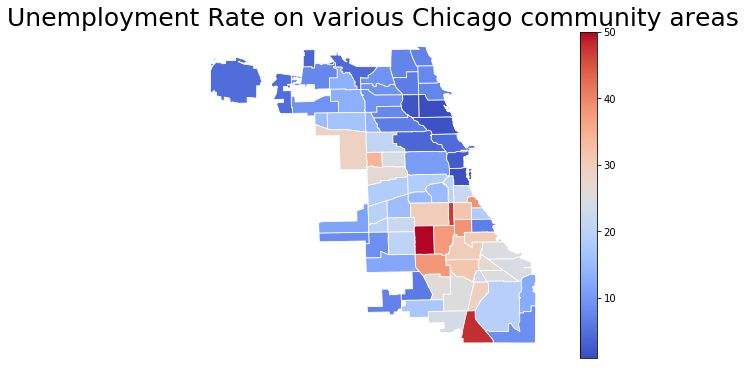

In [18]:
variable = "PERCENT AGED 16+ UNEMPLOYED"
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 1, 50

socioecon_map.plot(column=variable, cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("Unemployment Rate on various Chicago community areas", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

#Legend 
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


## [VIZ2] Per Capita Income over Chicago Neighborhoods

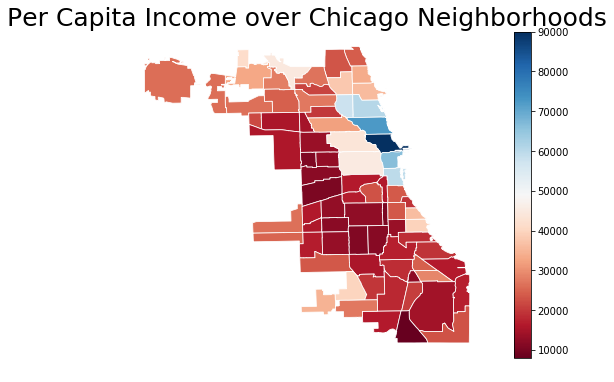

In [19]:
variable = "PER CAPITA INCOME "
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 8000, 90000

socioecon_map.plot(column=variable, cmap="RdBu", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("Per Capita Income over Chicago Neighborhoods", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

# Legend 
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


## [VIZ3] Crime Count per Chicago Community Area

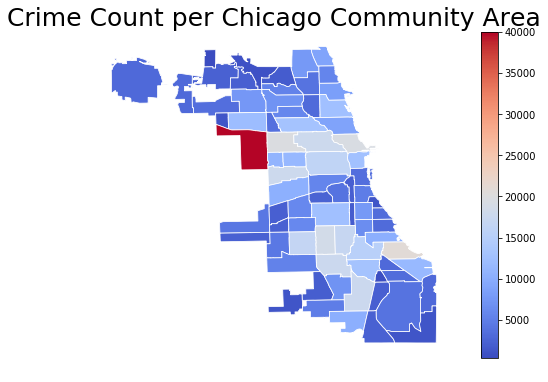

In [20]:
variable = "Crime Count"
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 400, 40000

crime_map.plot(column=variable, cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("Crime Count per Chicago Community Area", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

# Legend 
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


## [VIZ4] Percentage of Arrests made per Community

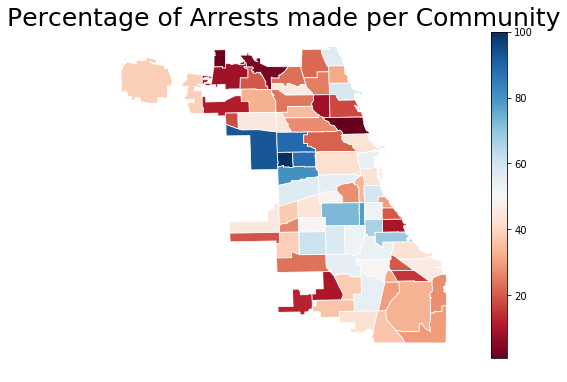

In [21]:
crimes.drop(crime.loc[crime['Community Area']== 0].index, inplace=True)
arrest = crimes.loc[crimes['Arrest'] == True]
arrest = arrest.groupby('Community Area').count()['ID'].reset_index(name="Arrest Count")
arrest['Crime Count'] = crime['Crime Count']
arrest['% Arrests'] = (arrest['Arrest Count'] / arrest['Crime Count']) * 100
arrest['Community Area'] = arrest['Community Area'].fillna(0.0).apply(np.int64)
arrest.dropna()
arrest_map = chicago_map.join(arrest, on='Community Area Number') 

variable = "% Arrests"
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 1, 100

arrest_map.plot(column=variable, cmap="RdBu", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("Percentage of Arrests made per Community", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

# Legend 
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

## [VIZ5] % aged 25+ without HS diploma over Chicago Neighborhoods

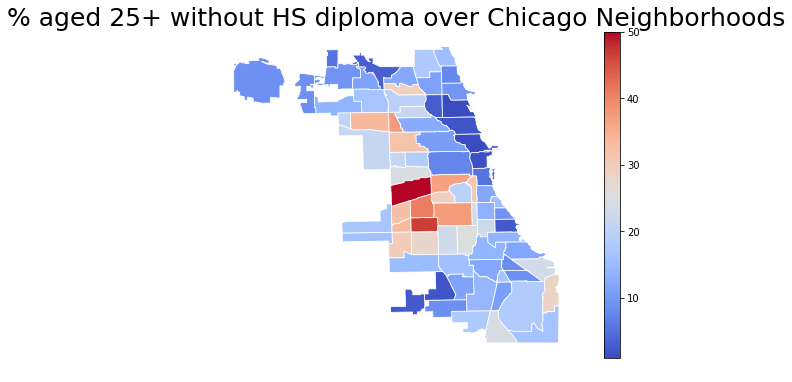

In [22]:
variable = "PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"
fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 1, 50

socioecon_map.plot(column=variable, cmap="coolwarm", linewidth=0.8, ax=ax, edgecolor='1')
ax.set_title("% aged 25+ without HS diploma over Chicago Neighborhoods", fontdict={"fontsize": 25, "fontweight" : 5})
ax.axis('off')

#Legend 
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

## Data for plotting crime change for top categorical neighborhood from 2008 to 2012Â¶


In [23]:
crime = pd.read_csv("dataFiltered.csv")
crime.dropna()
crime.drop(crime.loc[crime['Community Area']== 0].index, inplace=True)


data_2008 = crime.loc[crime['Year']==2008]
community_area=[]
data= crime.groupby(['Year','Community Area']).count()['ID'].reset_index()#.apply(lambda g:g / g.sum())
sum_data = (data.groupby(['Year']).apply(lambda g: (g['ID']/g['ID'].sum())).reset_index(name = 'Percent of Crime'))
for i in range(0,6):
        for j in range(1,78):
            community_area.append(j)
arr_data = np.array(community_area)
sum_data = sum_data.drop(columns=['level_1'])
sum_data['Community Area'] = pd.DataFrame(data=community_area)
sum_data = sum_data[['Year','Community Area','Percent of Crime']]
sum_data['Percent of Crime'] = sum_data['Percent of Crime'].apply(lambda x: "{0:.2f} %".format(x*100))
print(sum_data)

# Top 25% (99-75)
# Mid 50% (74-25)
# Bot 25% (24-0)
# x = socioecon.sort_values(['PER CAPITA INCOME '], ascending=False)
# top = x.iloc[0:18]
# uppermid = x.iloc[19:38]
# lowermid = x.iloc[39:58]
# bot = x.iloc[59:78]

# top = top.join(aggregate_crimes.set_index('Community Area'), on='Community Area Number')
# top = top.groupby(['Year']).sum().reset_index()

# uppermid = uppermid.join(aggregate_crimes.set_index('Community Area'), on='Community Area Number')
# uppermid = uppermid.groupby(['Year']).sum().reset_index()

# lowermid = lowermid.join(aggregate_crimes.set_index('Community Area'), on='Community Area Number')
# lowermid = lowermid.groupby(['Year']).sum().reset_index()

# bot = bot.join(aggregate_crimes.set_index('Community Area'), on='Community Area Number')
# bot = bot.groupby(['Year']).sum().reset_index()

       Year  Community Area Percent of Crime
0    2008.0               1           1.47 %
1    2008.0               2           1.29 %
2    2008.0               3           1.42 %
3    2008.0               4           0.66 %
4    2008.0               5           0.62 %
5    2008.0               6           1.96 %
6    2008.0               7           1.58 %
7    2008.0               8           3.11 %
8    2008.0               9           0.11 %
9    2008.0              10           0.46 %
10   2008.0              11           0.42 %
11   2008.0              12           0.18 %
12   2008.0              13           0.37 %
13   2008.0              14           0.86 %
14   2008.0              15           1.34 %
15   2008.0              16           1.13 %
16   2008.0              17           0.66 %
17   2008.0              18           0.25 %
18   2008.0              19           1.99 %
19   2008.0              20           0.63 %
20   2008.0              21           0.97 %
21   2008.

# Machine Learning Analysis
Our team plotted a correlation heatmap to look into pairs of variables that has a strong linear relationship to each other. In the heatmap below, a lighter shade means that the relationship between two variables is more linear. Otherwise, a darker shade indicates lesser linear relationship to each other.

Text(0.5, 1.0, 'Correlation Heatmap')

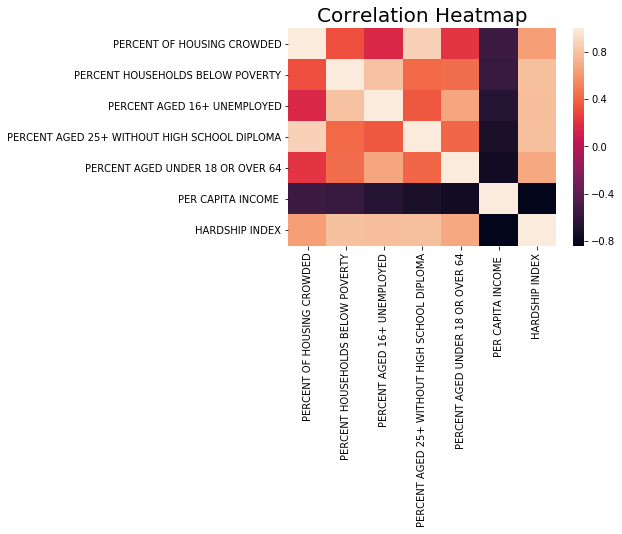

In [26]:
# Check the correlation
sns.heatmap( socioecon.corr() ).set_title("Correlation Heatmap", size=20)

### Per Capita Income v. Crime Count
The visualization below indicates that as Per Capita Income increase, the crime count decreases.

Coefficient:  [0.054572]
Variance [R^2]:  -0.2025454796525501


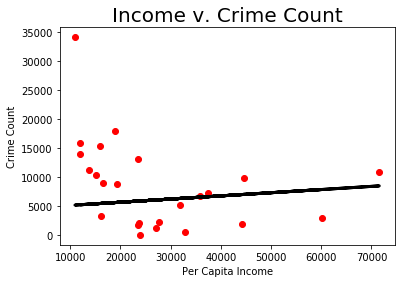

In [27]:
# Collect X and Y
X = socioecon['PER CAPITA INCOME '].values.reshape(-1, 1)
y = arrest['Crime Count'].values

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create regression line
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
# mean_squared_error(y_test, y_pred)
var = r2_score(y_test, y_pred) 

print('Coefficient: ', reg.coef_)
print('Variance [R^2]: ', var)

# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.title('Income v. Crime Count', size=20)
plt.xticks()
plt.yticks()
plt.xlabel('Per Capita Income')
plt.ylabel('Crime Count')
plt.show()

### % Arrests v. Crime Count
The visualization below indicates as Crime counts increase, Arrest percentage goes down. This also shows the reliability of the data because where there is low crime count, low arrest percentage would make sense. 

Coefficient:  [-5.66746501e-05]
Variance [R^2]:  0.049232340632964666


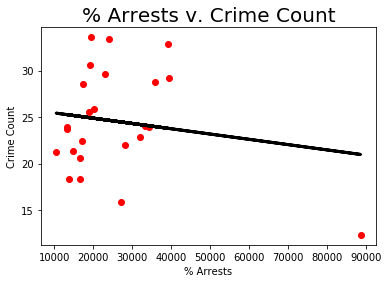

In [28]:
# Collect X and Y
X = socioecon['PER CAPITA INCOME '].values.reshape(-1, 1)
y = arrest['% Arrests'].values

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create regression line
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
# mean_squared_error(y_test, y_pred)
var = r2_score(y_test, y_pred) 

print('Coefficient: ', reg.coef_)
print('Variance [R^2]: ', var)

# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.title('% Arrests v. Crime Count', size=20)
plt.xticks()
plt.yticks()
plt.xlabel('% Arrests')
plt.ylabel('Crime Count')
plt.show()

### Unemployment Rate v. % Arrests
The visualization belows shows that as unemployment rate increases, arrest rates go up.

Coefficient:  [0.27552995]
Variance [R^2]:  -0.29896701280414484


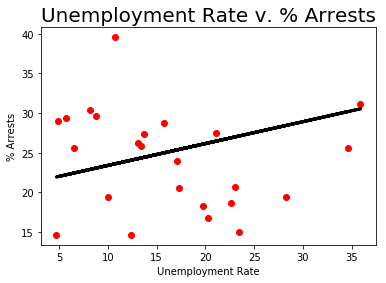

In [29]:
# Collect X and Y values
X = socioecon['PERCENT AGED 16+ UNEMPLOYED'].values.reshape(-1, 1)
y = arrest['% Arrests'].values

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create regression line
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
# mean_squared_error(y_test, y_pred)
var = r2_score(y_test, y_pred) 

print('Coefficient: ', reg.coef_)
print('Variance [R^2]: ', var)

# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='black', linewidth=3)
plt.title('Unemployment Rate v. % Arrests', size=20)
plt.xticks()
plt.yticks()
plt.xlabel('Unemployment Rate')
plt.ylabel('% Arrests')
plt.show()

### Community Area 25's Crime Percentage every year
The visualization below shows that crime percentage for area 25 was initially increasing but then it has decreased immensely near the year 2012. 

       Year  Community Area  Percent of Crime
24   2008.0              25          6.395975
101  2009.0              25          6.619886
178  2010.0              25          6.707668
255  2011.0              25          6.510840
332  2012.0              25          6.309231


Text(0.5, 1.0, 'Community Area 25 Crime Percentage Every Year')

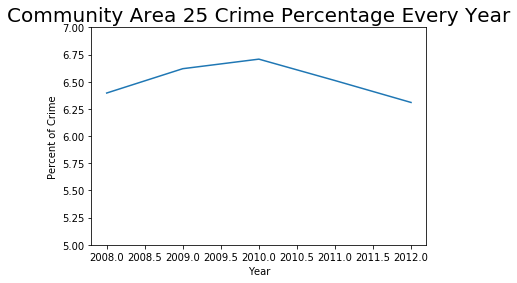

In [30]:
crime = pd.read_csv("dataFiltered.csv")
crime.dropna()
crime.drop(crime.loc[crime['Community Area']== 0].index, inplace=True)


data_2008 = crime.loc[crime['Year']==2008]
community_area=[]
data= crime.groupby(['Year','Community Area']).count()['ID'].reset_index()#.apply(lambda g:g / g.sum())
sum_data = (data.groupby(['Year']).apply(lambda g: 100*(g['ID']/g['ID'].sum())).reset_index(name = 'Percent of Crime'))
for i in range(0,6):
        for j in range(1,78):
            community_area.append(j)
arr_data = np.array(community_area)
sum_data = sum_data.drop(columns=['level_1'])
sum_data['Community Area'] = pd.DataFrame(data=community_area)
sum_data = sum_data[['Year','Community Area','Percent of Crime']]
#sum_data['Percent of Crime'] = sum_data['Percent of Crime'].apply(lambda x: "{0:.2f} %".format(x*100))
#sum_data=sum_data.set_index('Community Area')
comm_area = sum_data.loc[sum_data['Community Area']==25]
print(comm_area)
ax = sns.lineplot(x='Year',y ='Percent of Crime', data = comm_area, markers = True)
ax.set_ylim(5,7)
ax.set_title('Community Area 25 Crime Percentage Every Year', size=20)


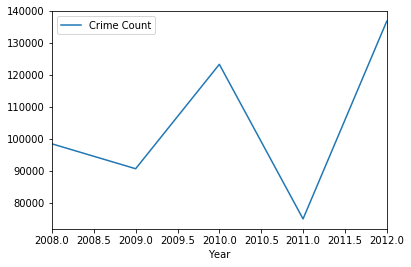

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [31]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
x = pd.read_csv("dataFiltered.csv")
x['Year'] = x['Year'].fillna(0.0).apply(np.int64)
x = x.groupby('Year').count()['ID'].reset_index(name="Crime Count")
x=x.iloc[1:]
x.head()
x.plot.line(x = 'Year', 
             y = 'Crime Count')
plt.show()
fit1 = ExponentialSmoothing(x, seasonal_periods=2, trend='add', seasonal='add').fit(use_boxcox=True)


fit1.forecast(12).plot(style='--', marker='o', color='red', legend=True)

plt.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")

In [32]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline



Crimes= pd.read_csv('ChicagoSocioecon.csv') 
A = Crimes.drop('PER CAPITA INCOME ', axis=1)
A = Crimes.drop('COMMUNITY AREA NAME', axis=1)

X=A.drop(A.index[77])

B= Crimes['PER CAPITA INCOME ']
y= B.drop(B.index[77])



# DECISION TREE REGRESSION



#### We are using the Chicago Socioeconomic Dataset to try and predict Per Capita Income (in US DOLLARS) in the Chiago Neighborhoods for each community area number based upon % of Housing Crowded, % Households below poverty, % aged 16+ unemployed, % Aged 25+ without highschool diploma,	% aged under 18 OR over 64.

import pandas as pd
from sklearn import linear_model
from  matplotlib import pyplot 
import numpy as np

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)  
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  



In [34]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1826.3125
Mean Squared Error: 19330900.0625
Root Mean Squared Error: 4396.691945372111


### The two graphs below show the Visualization of the machine learning model built using Decision Tree Regression. It is pretty close to actual values, if you see closely.

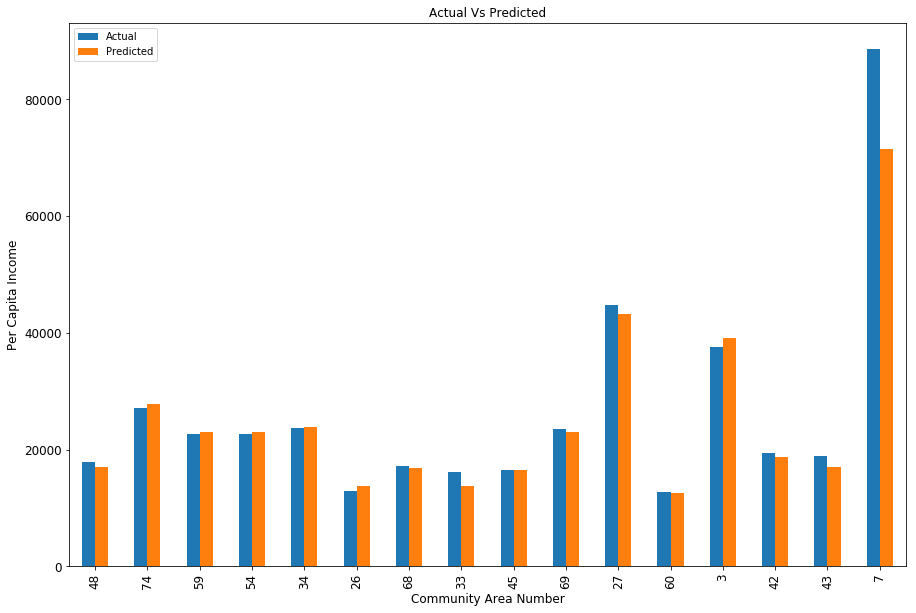

In [35]:
ax = pd.DataFrame({
'Actual': [17949,27149,22694,22677,23791,12961,17285,16148,16579,23482,44689,12765,37524,19398,18881,88669],
'Predicted': [18672,27751,24454,23040,23472,13231,16907,16563,16563,24336,35787,12171,39056,18672,18672,65526]
}, index=[48,74,59,54,34,26,68,33,45,69,27,60,3,42,43,7])

ax = df[['Actual','Predicted']].plot(kind='bar', title ="Actual Vs Predicted", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Community Area Number", fontsize=12)
ax.set_ylabel("Per Capita Income", fontsize=12)
plt.show()



# Reflection

The hardest part of the project that we have encountered so far was cleaning the data. Initially, the crimes data CSV file we downloaded was 423 MB. The issue was that none of us had any previous experience with databases. Therefore, we used python in order to condense the size of the file by filtering out the information we needed in order to do data analysis. It took a little bit of research to get this initial step done, which we believe has been the hardest encounter thus far for us in this project.

After doing a bit of data analysis, a key insight we have found is that middle class is actually disappearing. After looking at the per capita income visualization per community from above, we have noted that communities with low income have higher crime counts. Thus, we believe that per capita income has major effects on crime rate in chicago. This is a very imporatant insight in this project. Another insight, we have understood is that not having a highschool diploma also has impacts on crime counts. After closely analyzing the "Highschool Education in Each Community" visualization and comparing it against "Crime count per Chicago Community Area" visualization, we analyzed that communities with higher high school dropouts have higher crime counts. Its a direct relationship.This was another very interesting insight. 

There are few concrete result we can show at this point. Based on our data analysis and viusalizations above, we can conclude the following:
1. As per capita income goes up the crime count decreases.(per community)
2. As unemployment rate goes up the crime count increases.(per community)
3. As high drop out rate increases, the crime count increases.(per community)

We are currently using these three factors to predict for each community whether, the crime rate will increase or decrease in the future. We are taking advantage of linear regression. 

Going forward, the current biggest problem we are facing is that due to alot of data, it is becoming very hard to correlate data. We are joining tables together and recogonizing ourselves what belongs together. Getting the data organized is the challenging part because we have alot of raw data. We want to be as unbiased as possible so the communities could really benefit from our conclusions. Another problem, we will face is actually coming up with a prototype or an idea on how to properly to display the solution. We are still discussing what solution we will come up with looking at the patterns in data. 

We believe we are in track with our project. We have cleaned the data and found significant insights using data visualizations. We believe, we should dedicate a little more time on improving data visualizations and to come with a lot more detailed-oriented visualizations so that the communities could benefit from it. We truly feel it is worth proeceeding with our project because we believe that the communites in chicago should really know what is causing the crime rates to fluctuate and thus as a result we could try and look at those factors that are contributing immenesly to the crime rate and reduce them and as a result crime rate would also be reduced in domino effect.  Its a direct relationship.This was another very interesting insight.

# Next Steps
Our goal is to continue using machine learning techniques to further analyze the data set and predict how other factors such as capita income, poverty level, and crowded housing will effect the communities in the next couple of years. We will be using linear regression to do this.

Also we want to be able give the finishing touches to the project and make sure we have done a complete analysis of the crimes in chicago and how the middle class is disappearing. We want to also take into account any data anamolies and provide explanation as to why those exist.

I think the time we will know when our goal is achieved is when we have solid reasoning with facts and data that shows that the middle class is disappearing in the communities and when we have figured out what data anamolies exist and know exactly why and provide solid explanations for those.